In [75]:
#importing the modules used to analyze data
import pandas as pd
import matplotlib.pyplot as plt


In [83]:
#reading the csv file 
health = pd.read_csv('health.csv')
health.head()

,cid,survey,wt20_dual,wt20_dual_q1,qxvers,mood1,mood2,mood3,mood4,mood5,...,sexaslttouch,sexasltrape,dvscreen,wt_compare,strata,strata_q1,bthcntrltype19,insure19r,hhsize,child
0,2000001,20,1014.111405,1298.712123,1,5,5,5,5,4,...,2.0,2.0,2.0,1014.111405,20191402,20191402.0,NaN,1.0,2,2.0
1,2000002,20,60.653305,147.643223,1,5,3,3,3,3,...,2.0,2.0,2.0,60.653305,20191309,20191309.0,NaN,3.0,1,2.0
2,2000003,20,75.367704,108.963691,1,5,4,5,5,5,...,2.0,2.0,2.0,75.367704,20191402,20191402.0,NaN,3.0,1,2.0
3,2000004,20,1015.285504,NaN,2,5,4,5,5,3,...,2.0,2.0,2.0,1015.285504,20199399,NaN,NaN,1.0,3,1.0
4,2000005,20,223.768505,387.054275,1,5,5,5,5,5,...,2.0,2.0,2.0,223.768505,20191207,20191207.0,NaN,NaN,1,2.0


I imported the csv file using read_csv and saved it to a variable so that I could begin to perform a cleaning an analysis with the data set.

In [84]:
#how much data
health.shape

(8253, 152)

I used health.shape to display the numnber of rows and columns currenlty present in the data set before I began to clean.

In [85]:
#grabbing columns from data set
columns_we_want = [ "insuredgateway19","generalhealth", "visitnonpcp12m19", "pcp19","didntgetcare19","emp3", "insure5","birthsex","imputed_neighpovgroup4_1418", "fluvaccineshot","everhepavaccine","fruitveg19"]
health[columns_we_want]
health = health[columns_we_want]

I began to clean the data by looking through the columns and choosing the ones that would be useful to my analysis and would be the best representation of access to healthcare. I grabbed the columns by creating a list of the column names I wanted to use and saved it as columns_we_want. Than I overrode the original dataset by using health = health[columns_we_want]

In [86]:
#renaming columns
health = health.rename(columns = {'insuredgateway19' : 'insured', 'visitnonpcp12m19' : 'seen_a_doctor_in_12months?', 'pcp19' : 'primary_doctor', 'insure5': 'who_insures_you','emp3': 'employed', 'imputed_neighpovgroup4_1418': 'below_poverty','fruitveg19':'fruit_veggie_servings','everhepavaccine': 'revieved_hepatatis_vaccine','didntgetcare19': 'didnt_get_care'})
health.head()

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didnt_get_care,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
0,1.0,3.0,1.0,1.0,2.0,3.0,1.0,2.0,2,1.0,3.0,2.0
1,1.0,2.0,2.0,NaN,2.0,3.0,2.0,2.0,2,2.0,2.0,1.0
2,1.0,2.0,1.0,1.0,2.0,3.0,2.0,1.0,2,1.0,3.0,2.0
3,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,3,2.0,2.0,2.0
4,1.0,2.0,2.0,1.0,2.0,3.0,NaN,2.0,4,2.0,2.0,2.0


Here we began to rename the columns, so that they were easier to understand. We went about this by creating a dictionary that contained both the original column name and the one we wanted to change it to. This was executed using he .rename() function.

In [87]:
# describing the basics of the numerical data using the describe varaibles
health.describe()

,insured,generalhealth,seen_a_doctor_in_12months?,primary_doctor,didnt_get_care,employed,who_insures_you,birthsex,below_poverty,fluvaccineshot,revieved_hepatatis_vaccine,fruit_veggie_servings
count,8213.000000,8227.000000,8238.000000,8207.000000,8205.000000,8172.000000,8026.000000,8224.000000,8253.000000,8178.000000,8243.000000,8028.000000
mean,1.094241,2.696973,1.127337,1.139515,1.880073,1.778512,2.172315,1.561527,2.389192,1.492541,1.823972,2.051570
std,0.292181,1.121782,0.333370,0.346504,0.324896,0.943068,1.302893,0.496230,0.937318,0.499975,0.720247,0.492456
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000
75%,1.000000,3.000000,1.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,2.000000,5.000000,2.000000,2.000000,2.000000,3.000000,5.000000,2.000000,4.000000,2.000000,3.000000,3.000000


Here we utilized the .describe() fuction to give the overall numeric statistics of the categorical data.

In [101]:
#Renaming data points in below_poverty and other columns I am preforming analysis on so that the data is understandable to the user. 
health_copy1 = health.copy()
health_copy1.loc[health_copy1.below_poverty == 1, "below_poverty"] = "0 - <10% (low pov)%"
health_copy1.loc[health_copy1.below_poverty == 2, "below_poverty"] = "10 - <20%"
health_copy1.loc[health_copy1.below_poverty == 3, "below_poverty"] = "20 - <30%"
health_copy1.loc[health_copy1.below_poverty == 4, "below_poverty"] = "30 - <100% (very high)"

health_copy1.loc[health_copy1.insured == 1, "insured"] = "yes"
health_copy1.loc[health_copy1.insured == 2, "insured"] = "no"

health_copy1.loc[health_copy1.primary_doctor == 1, "primary_doctor"] = "yes"
health_copy1.loc[health_copy1.primary_doctor == 2, "primary_doctor"] = "no"

health_copy1.loc[health_copy1.didnt_get_care == 1, "didnt_get_care"] = "yes"
health_copy1.loc[health_copy1.didnt_get_care == 2, "didnt_get_care"] = "no"

health_copy1.loc[health_copy1.who_insures_you == 1, "who_insures_you"] = "Private"
health_copy1.loc[health_copy1.who_insures_you == 2, "who_insures_you"] = "self-purchase"
health_copy1.loc[health_copy1.who_insures_you == 3, "who_insures_you"] = "Medicare"
health_copy1.loc[health_copy1.who_insures_you == 4, "who_insures_you"] = "Medicaid"
health_copy1.loc[health_copy1.who_insures_you == 4, "who_insures_you"] = "Others"
health_copy1.loc[health_copy1.who_insures_you == 4, "who_insures_you"] = "Uninsured"


print(health_copy1.head())


  insured  generalhealth  seen_a_doctor_in_12months? primary_doctor  \
0     yes            3.0                         1.0            yes   
1     yes            2.0                         2.0            NaN   
2     yes            2.0                         1.0            yes   
3     yes            2.0                         1.0            yes   
4     yes            2.0                         2.0            yes   

  didnt_get_care  employed who_insures_you  birthsex           below_poverty  \
0             no       3.0         Private       2.0               10 - <20%   
1             no       3.0   self-purchase       2.0               10 - <20%   
2             no       3.0   self-purchase       1.0               10 - <20%   
3             no       1.0         Private       2.0               20 - <30%   
4             no       3.0             NaN       2.0  30 - <100% (very high)   

   fluvaccineshot  revieved_hepatatis_vaccine  fruit_veggie_servings  
0             1.0    

We then went on to clean the data further to give the values the categorical meaning that they were assigned, so that the value_counts analysis and histograms would be more clear than they would have had they still be categorized by numbers. We chose to save the values to a copy of the health data (health_copy1) in cause we chose to use the numerical values in a later analysis. 

In [107]:
display(health_copy1.didnt_get_care.value_counts(normalize=True)*100)
display(health_copy1.insured.value_counts(normalize=True)*100)
display(health_copy1.primary_doctor.value_counts(normalize=True)*100)

no     88.007313
yes    11.992687
Name: didnt_get_care, dtype: float64

yes    90.575916
no      9.424084
Name: insured, dtype: float64

yes    86.048495
no     13.951505
Name: primary_doctor, dtype: float64

The previous cells shows the demographics of NYC as a whole and it calculates the percentages of  those who have insurance, those who have a primary doctor, and those who are unable to recieve care when they need it. These percents can later be used to compare the neighborhoods of different income levels to NYC overall. The percents were found using the value_counts() fucntion, and normalizing the data to show it as a ratio. This ratio was then multiplied ny 100 to create a percent.

Text(0.5, 1.0, 'distribution of residents living in specific income neighborhoods')

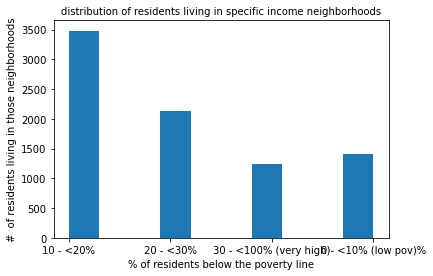

In [108]:
plt.hist(health_copy1['below_poverty'])
plt.xlabel('% of residents below the poverty line',fontsize=10)
plt.ylabel("#  of residents living in those neighborhoods",fontsize=10)
plt.title('distribution of residents living in specific income neighborhoods',fontsize=10)

We created this histogram using the plt.hist function. The histogram is used to display the number of NYC residents surveyed who fall into each of the categories of specific below poverty percentages.  

In [ ]:
group_poverty = health_copy1.groupby('below_poverty').insured
insured_poverty= group_poverty.value_counts(normalize=True)*100
print(insured_poverty)

This analysis uses the .groupby() function to group the data by the percent of people in a neighborhood who are below the poverty line. After the groups were formed, the percents of those insured in these categories was found using the value_counts() fucntion, and normalizing the data to show it as a ratio. This ratio was then multiplied ny 100 to create a percent.

This analysis shows that as the below poverty percentage increases (more people in that neighborhood are living in poverity) then the percent of people insured decreases. As the number of people in poverty increases, the percent of those with insurance decreases by about an increment of about 3% each time. This creates an approximate 8% differnce in those insured in the neighborhoods with the lowest poverty rate to the highest.

In [ ]:
group_poverty2 = health-.groupby('below_poverty').primary_doctor
dr_poverty = group_poverty2.value_counts(normalize=True)*100
print(dr_poverty)

This analysis uses the .groupby() function to group the data by the percent of people in a neighborhood who are below the poverty line. After the groups were formed, the percents of those who had a primary doctory within each poverty level were found using the value_counts() fucntion, and normalizing the data to show it as a ratio. This ratio was then multiplied ny 100 to create a percent.

In [ ]:
group_poverty3 = health_copy1.groupby('below_poverty').didnt_get_care
didnt_poverty = group_poverty3.value_counts(normalize=True)*100
print(didnt_poverty)

This analysis uses the .groupby() function to group the data by the percent of people in a neighborhood who are below the poverty line. After the groups were formed, the percents of those who didn't get care when they needed it within each poverty level were found using the value_counts() fucntion, and normalizing the data to show it as a ratio. This ratio was then multiplied by 100 to create a percent.

In [ ]:
# i want to make a group by so i can see the distribution of what insuraunce each neighborhood has 
plt.hist(health_copy1['who_insures_you'])
#plt.xlabel('% of residents below the poverty line',fontsize=15)
#plt.ylabel("#  of residents living in those neighborhoods",fontsize=15)
#plt.title('distribution of residents living in specific income neighborhoods',fontsize=15)

## Data Limitations:
The data in the health survery is all categorial data that is represented by numerical values. While some computations can be peformed on the data, this data set is best used in calulating percentages and showing distribution. When trying to show correlation in a scatterplot the results are inconclusive becasue there are only x amount of categories that the population can fall into. 
Beyod calculations, this data is also limited because it only includes those who have access to either a cell phone or a landline. This could possible scew the data as those with housing security are less likely to represent a population who does not have access to healthcare.

## Data explanation: 
This data set is created from a survery given to indivuals in NYC. The data set explores the general health of these residents as well other demographics such as income, gender, etc. The data is all categorical, but is represented as numbers in the dataset. In the finalized data sets we can see how poverty levels in NYC neighborhoods affect an indivuals access to healthcare. The data set can show this relationship by comparing the % of people below poverty in a specific neighborhood to the number of people insured, the number of people who have a regular doctor, and accessiblitiy to needed care. Additionally, this data set can begin to explore access to nutitious foods and vaccinations; however, there may be outside factors that also influence these demograohics that may not be directly seen through income levels.
NOTE: This data set is currently incomplete and we are attempting to get access to boroughs and other demographic information that is not for publce use

## Data Description:
1. In this data set the rows are equal to the indivual answering the survey questions and the columns are equal to the questions asked on the surver. These questions relate to different health statistics(general health, is the particpant insured?,etc)
2. This data was complied to track risk behaviors and to have a more comprehensive understanding of New York City's residents health. 
3. This data collection was funded by the New York City Department of Health and Mental Hygiene.
4. The data is collected via stratified random sample to find data that gives neighborhood and city-wide information. However, this process is inluenced because data is only collected from households with a landline or residents with a cellular phone. Aditionally, the survey has been only been translated into Spanish, Russian, Chinese , Bengali, and Haitian Creole, which may limit the amount of those who are selected who can participate.
5. The data was pre-processed by adding weight to the data collected in an attempt to negate any human biases that were a result of the participants answering questions about themselves. Additionally, the answers from the surveys were translated into numbers ( an answer 'yes' may now equal '1') before being added to the dataframe.
6. This data is collected based off of interviews, so all of the human paticpants agreed to the survey and knew their data was going to be collected. It is unclear whether or not the participants had knowledge of how their data was going to be used.